In [9]:
import matplotlib.pyplot as plt
import numpy as np
import sympy
# Function to plot the equation in the specified domain



In [9]:

def plot_equation(equation, domain):
    # Create an array of x values in the specified domain
    x = np.linspace(domain[0], domain[1], 100)

    # Evaluate the equation for each x value
    y = eval(equation)

    # Create the plot
    plt.plot(x, y)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Plot of ' + equation)
    plt.grid(True)

    # Display the plot
    plt.show()


In [3]:
import sympy
# Get user input for the equation and domain
equation = "x^2+4x"
domain_expr = [2,4]

equation = equation.replace("^","**")

print (equation)
# Create a symbolic variable for the domain expression
x = sympy.Symbol('x')

# Evaluate the domain expression
domain = sympy.solve(domain_expr, x)
print(domain)
if len(domain) != 2:
    print("Invalid domain expression. Please enter a valid expression.")
else:
    # Convert the domain values to floats
    domain = [float(val) for val in domain]

    # Plot the equation
    plot_equation(equation, domain)


x**2+4x
[]
Invalid domain expression. Please enter a valid expression.


In [16]:
import matplotlib.pyplot as plt
import numpy as np


def is_equation_valid(equation):
    x = sympy.Symbol('x')
    try:
        # Try to evaluate the equation
        eval(equation)
        return True
    except (SyntaxError, NameError, TypeError, ZeroDivisionError):
        # Catch specific errors that may occur if the equation is invalid
        return False


# def plot_equation(equation, domain):
#     # Create an array of x values in the specified domain
#     x = np.linspace(domain[0], domain[1], 100)

#     # Evaluate the equation for each x value
#     y = eval(equation)

#     # Create the plot
#     plt.plot(x, y)
#     plt.xlabel('x')
#     plt.ylabel('y')
#     plt.title('Plot of ' + equation)
#     plt.grid(True)

#     # Display the plot
#     plt.show()


# Get user input for the equation and domain
equation = input("Enter the equation: ")
print(type(equation))
valid = is_equation_valid(equation)

print (valid)
# if valid:
#     # Get user input for the domain
#     start = float(input("Enter the start of the domain: "))
#     end = float(input("Enter the end of the domain: "))

#     # Plot the equation
#     plot_equation(equation, [start, end])
# else:
#     print("Invalid equation. Please enter a valid equation.")


<class 'str'>


NameError: name 'sympy' is not defined

In [ ]:
def are_parentheses_valid(expression):
    stack = []
    opening_symbols = ['(', '[', '{']
    closing_symbols = [')', ']', '}']
    symbol_pairs = dict(zip(closing_symbols, opening_symbols))

    for char in expression:
        if char in opening_symbols:
            stack.append(char)
        elif char in closing_symbols:
            if len(stack) == 0 or stack[-1] != symbol_pairs[char]:
                return False
            stack.pop()

    return len(stack) == 0


In [115]:
def is_equation_valid(equation):
    stack = []
    opening_symbols = ['(', '[', '{']
    closing_symbols = [')', ']', '}']
    valid_operators = ['+', '-', '*', '/', '^']
    # Valid characters in the equation (digits and 'x')
    valid_chars = set('0123456789x')

    # Remove whitespace from the equation
    symbol_pairs = dict(zip(closing_symbols, opening_symbols))
    equation = equation.replace(" ", "")

    if not equation or not set(equation).issubset(valid_chars.union(valid_operators, opening_symbols, closing_symbols)):
        return False

    # Check if the equation starts and ends with valid characters
    if (equation[0] not in valid_chars  and equation[0] not in opening_symbols ) or (equation[-1] not in valid_chars and equation[-1] not in closing_symbols):
        return False

    for i in range(len(equation) - 1):
        current_char = equation[i]
        next_char = equation[i + 1]
        if current_char in opening_symbols:
            stack.append(current_char)
            if next_char not in valid_chars:
                return False
        elif current_char in closing_symbols:
            if len(stack) == 0 or stack[-1] != symbol_pairs[current_char]:
                return False
            stack.pop()
            if next_char in valid_operators:
                continue
        elif current_char in valid_chars and next_char in valid_chars:
            if next_char != 'x':
                continue
            return False  # Two consecutive valid characters (e.g., "x2")
        elif current_char in valid_chars and next_char in valid_operators:
            continue  # Valid character followed by a valid operator
        elif current_char in valid_operators and next_char in valid_chars:
            continue  # Valid operator followed by a valid character
        elif current_char in valid_operators and next_char in opening_symbols:
            continue
        elif current_char in valid_chars and next_char in closing_symbols:
            continue
        else:
            return False  # Invalid operator placement or consecutive operators


    return len(stack) == 0


In [118]:
equation = "(2-4^x)*1 + x*2  "
valid = is_equation_valid(equation)

if valid:
    print("The equation is valid.")
else:
    print("The equation is invalid.")


The equation is valid.


In [138]:
class EquationValidator:
    def __init__(self):
        self.opening_symbols = ['(', '[', '{']
        self.closing_symbols = [')', ']', '}']
        self.valid_operators = ['+', '-', '*', '/', '^']
        self.valid_chars = set('0123456789x')
        self.symbol_pairs = dict(
            zip(self.closing_symbols, self.opening_symbols))

    def is_equation_valid(self, equation):
        stack = []
        equation = self._remove_whitespace(equation)

        if not self._is_valid_chars(equation):
            return False

        if not self._is_valid_start_end(equation):
            return False

        for i in range(len(equation) - 1):
            current_char = equation[i]
            next_char = equation[i + 1]

            if self._handle_opening_symbol(current_char, next_char, stack):
                continue
            elif self._handle_closing_symbol(current_char, next_char, stack):
                continue
            elif self._handle_valid_chars(current_char, next_char):
                continue
            elif self._handle_valid_operator(current_char, next_char):
                continue
            else:
                return False  # Invalid operator placement or consecutive operators

        return len(stack) == 0

    def _remove_whitespace(self, equation):
        return equation.replace(" ", "")

    def _is_valid_chars(self, equation):
        return set(equation).issubset(self.valid_chars.union(self.valid_operators, self.opening_symbols, self.closing_symbols))

    def _is_valid_start_end(self, equation):
        return (equation[0] in self.valid_chars or equation[0] in self.opening_symbols) and (equation[-1] in self.valid_chars or equation[-1] in self.closing_symbols)

    def _handle_opening_symbol(self, current_char, next_char, stack):
        if current_char in self.opening_symbols:
            stack.append(current_char)
            return next_char in self.valid_chars
        return False

    def _handle_closing_symbol(self, current_char, next_char, stack):
        if current_char in self.closing_symbols:
            if len(stack) == 0 or stack[-1] != self.symbol_pairs[current_char]:
                return False
            stack.pop()
            return next_char in self.valid_operators
        return False

    def _handle_valid_chars(self, current_char, next_char):
        return current_char in self.valid_chars and next_char in self.valid_chars and next_char != 'x'

    def _handle_valid_operator(self, current_char, next_char):
        return current_char in self.valid_chars and next_char in self.valid_operators


# Example usage
equation = "(2-4^x)*1 + x*2  "

validator = EquationValidator()
valid = validator.is_equation_valid(equation)

if valid:
    print("The equation is valid.")
else:
    print("The equation is invalid.")


The equation is invalid.


<class 'numpy.ndarray'>


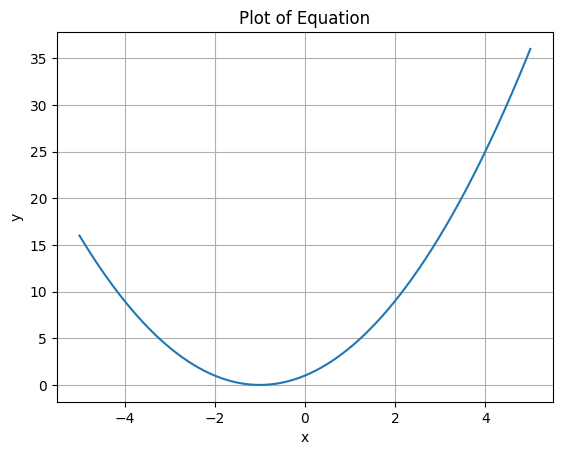

In [129]:
import numpy as np
import matplotlib.pyplot as plt

def equation(x):
    return x**2 + 2*x + 1

start = -5
end = 5
num_points = 2000

x = np.linspace(start, end, num_points)
y = equation(x)
print(type(y))
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of Equation')
plt.grid(True)
plt.show()

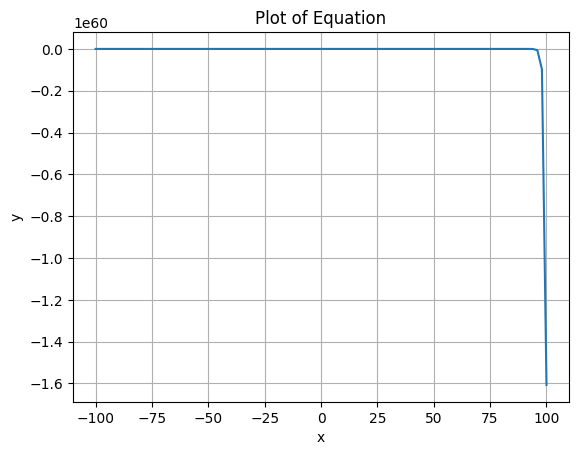

In [10]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt


def plot_equation(expression):
    x = sp.Symbol('x')
    equation = sp.sympify(expression)
    f = sp.lambdify(x, equation, 'numpy')

    x_values = np.linspace(-100, 100, 100)
    y_values = f(x_values)

    plt.plot(x_values, y_values)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Plot of Equation')
    plt.grid(True)
    plt.show()


# Example usage
expression = "(2-4**x)*1 + x*2  "
plot_equation(expression)


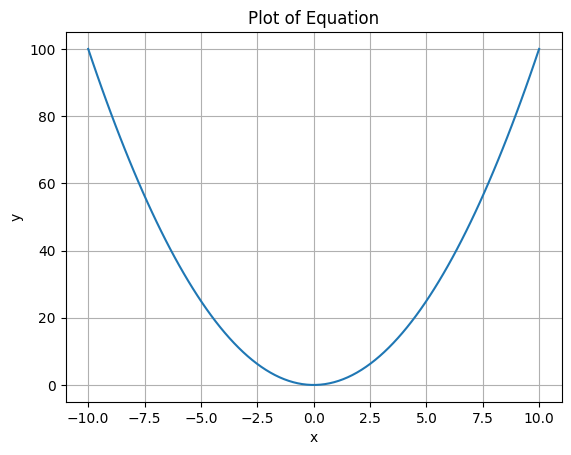

In [146]:
import numpy as np
import matplotlib.pyplot as plt


def plot_equation():
    x = np.linspace(-10, 10, 100)
    # Exclude points 5 and 7
    x = np.concatenate((x[x < 5], x[(x > 5) & (x < 7)], x[x > 7]))
    y = x**2

    plt.plot(x, y)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Plot of Equation')
    plt.grid(True)
    plt.show()


# Example usage
plot_equation()


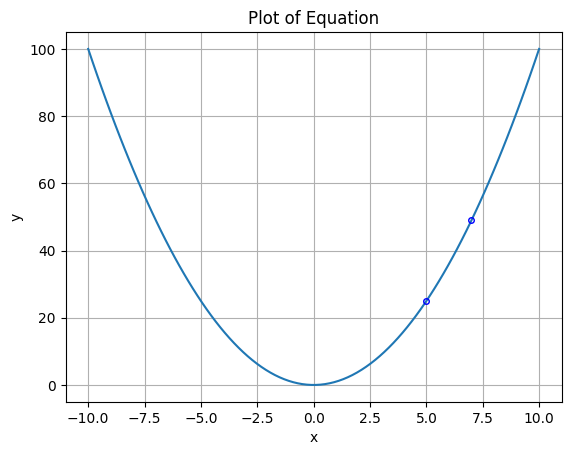

In [151]:
import numpy as np
import matplotlib.pyplot as plt


def plot_equation():
    x = np.linspace(-10, 10, 100)
    y = x**2

    plt.plot(x, y)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Plot of Equation')

    excluded_points = [5, 7]
    for point in excluded_points:
        plt.plot(point, point**2, 'o', fillstyle='none', markersize=4,
                markerfacecolor='none', markeredgecolor='blue')

    plt.grid(True)
    plt.show()


# Example usage
plot_equation()


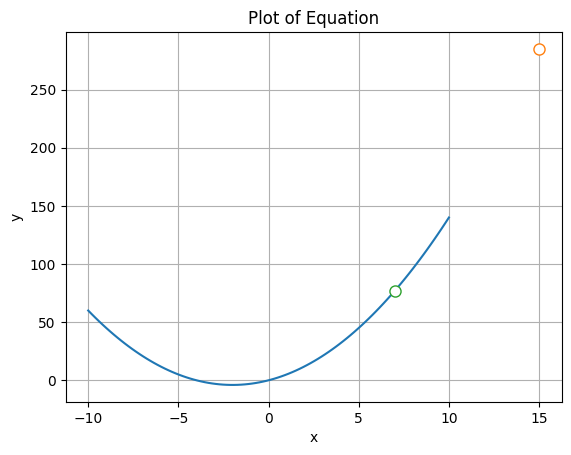

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def plot_equation():
    x = np.linspace(-10, 10, 100)
    # Exclude points 5 and 7
    x = np.concatenate((x[x < 5], x[(x > 5) & (x < 7)], x[x > 7]))
    y = x**2 + 4*x

    plt.plot(x, y)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Plot of Equation')

    excluded_points = [15 ,7]
    for point in excluded_points:
        plt.plot(point, point**2 + 4*point, 'o',markerfacecolor='white', markersize=8)

    plt.grid(True)
    plt.show()


# Example usage
plot_equation()

In [ ]:
def are_parentheses_valid(expression):
    stack = []
    opening_symbols = ['(', '[', '{']
    closing_symbols = [')', ']', '}']
    symbol_pairs = dict(zip(closing_symbols, opening_symbols))

    for char in expression:
        if char in opening_symbols:
            stack.append(char)
        elif char in closing_symbols:
            if len(stack) == 0 or stack[-1] != symbol_pairs[char]:
                return False
            stack.pop()

    return len(stack) == 0


In [2]:
class EquationValidator:
    def __init__(self):
        self.stack = []
        self.opening_symbols = {'(': ')', '[': ']', '{': '}'}
        self.valid_operators = {'+', '-', '*', '/', '^'}
        self.valid_chars = set('0123456789x')

    def is_equation_valid(self, equation):
        equation = self._remove_whitespace(equation)

        if not equation or not self._is_valid_chars(equation) or not self._is_valid_start_end(equation):
            return False

        for i in range(len(equation) - 1):
            current_char = equation[i]
            next_char = equation[i + 1]

            if current_char in self.opening_symbols.keys():
                self.stack.append(current_char)
                if next_char not in self.valid_chars:
                    return False
            elif current_char in self.opening_symbols.values():
                if len(self.stack) == 0 or current_char != self.opening_symbols[self.stack[-1]]:
                    return False
                self.stack.pop()
                if next_char in self.valid_operators:
                    continue
            elif current_char in self.valid_chars and next_char in self.valid_chars:
                if next_char != 'x':
                    continue
                return False  # Two consecutive valid characters (e.g., "x2")
            elif current_char in self.valid_chars and next_char in self.valid_operators:
                continue  # Valid character followed by a valid operator
            elif current_char in self.valid_operators and next_char in self.valid_chars:
                continue  # Valid operator followed by a valid character
            elif current_char in self.valid_operators and next_char in self.opening_symbols.keys():
                continue
            elif current_char in self.valid_chars and next_char in self.opening_symbols.values():
                continue
            else:
                return False  # Invalid operator placement or consecutive operators


        return len(self.stack) == 0

    def _remove_whitespace(self, equation):
        return equation.replace(" ", "")

    def _is_valid_chars(self, equation):
        return set(equation).issubset(self.valid_chars.union(self.valid_operators, self.opening_symbols.keys(), self.opening_symbols.values()))


    def _is_valid_start_end(self, equation):
        return (equation[0] in self.valid_chars or equation[0] in self.opening_symbols.keys()) and (equation[-1] in self.valid_chars or equation[-1] in self.opening_symbols.values())
    





In [38]:
def check_domanin_excepted_validation(domain):

    for item in range (len(domain)):
        try:
            domain[item] = float(domain[item])
        except ValueError:
            return False
    if domain:
        if domain[0] > domain[1] :
            return False
    return domain




In [4]:
def check_excepted_Points(excepted_Points):
    if excepted_Points:
        excepted_Points = [item for item in excepted_Points.split(',')]
        return check_domanin_excepted_validation(excepted_Points)


In [28]:
def plot_equation(expression, domain, excepted_Points):
    x = sp.Symbol('x')
    equation = sp.sympify(expression)
    function = sp.lambdify(x, equation, 'numpy')

    x_values = np.linspace(domain[0], domain[1], 100)
    y_values = function(x_values)
    print(x_values, y_values)

    
    if excepted_Points:
        for point in excepted_Points:
            plt.plot( point, function(point), 'o', fillstyle='none',markerfacecolor='white', markersize=8 )
    plt.plot(x_values, y_values)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Plot of Equation')
    plt.grid(True)
    plt.show()


In [40]:
# Example usage
equation = "x^2  "
start_value = input ("start value")
end_value = input ("end value")
excepted_Points = input("excepted values")

validator = EquationValidator()
valid = validator.is_equation_valid(equation)

domain = [start_value, end_value]

domain = check_domanin_excepted_validation(domain)

excepted_Points = check_excepted_Points(excepted_Points)

if not domain :
    print("Error in domain")
elif  not valid:
    print("The equation is invalid.")
else:
    equation = equation.replace("^", "**")
    plot_equation(equation , domain , excepted_Points)





Error in domain
